In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

%matplotlib notebook

# Import Data

In [3]:
# Import on XPS
blight_df = pd.read_csv("C:\\Users\\Adrian\\Google Drive\\School Work\\Applied Data Science with Python\\03 Applied Machine Learning in Python\\train.csv", encoding = 'ISO-8859-1')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (11,12,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Import on Lumi-MATLAB
blight_df = pd.read_csv("C:\\Users\\aperez\\Google Drive\\School Work\\Applied Data Science with Python\\train.csv", encoding = 'ISO-8859-1')

FileNotFoundError: File b'C:\\Users\\aperez\\Google Drive\\School Work\\Applied Data Science with Python\\train.csv' does not exist

In [2]:
# Import on Workstation
blight_df = pd.read_csv("C:\\Users\\aperez\\Google Drive\\School Work\\Applied Data Science with Python\\03 Applied Machine Learning in Python\\train.csv", encoding = 'ISO-8859-1')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (11,12,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data Cleanup

In [6]:
blight_df.columns

Index(['ticket_id', 'agency_name', 'inspector_name', 'violator_name',
       'violation_street_number', 'violation_street_name',
       'violation_zip_code', 'mailing_address_str_number',
       'mailing_address_str_name', 'city', 'state', 'zip_code',
       'non_us_str_code', 'country', 'ticket_issued_date', 'hearing_date',
       'violation_code', 'violation_description', 'disposition', 'fine_amount',
       'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'clean_up_cost', 'judgment_amount', 'payment_amount', 'balance_due',
       'payment_date', 'payment_status', 'collection_status',
       'grafitti_status', 'compliance_detail', 'compliance'],
      dtype='object')

In [5]:
blight_df['compliance_detail'].value_counts()

non-compliant by no payment                        129267
not responsible by disposition                      89735
non-compliant by late payment more than 1 month     19016
compliant by late payment within 1 month             6300
compliant by on-time payment                         3880
compliant by early payment                            992
not responsible by pending judgment disposition       691
compliant by no fine                                  195
compliant by payment with no scheduled hearing        161
compliant by payment on unknown date                   69
Name: compliance_detail, dtype: int64

In [7]:
blight_df['compliance_detail'][blight_df['compliance']==0].value_counts()

non-compliant by no payment                        129267
non-compliant by late payment more than 1 month     19016
Name: compliance_detail, dtype: int64

In [13]:
blight_df['compliance_detail'][blight_df['compliance']==1].value_counts()

compliant by late payment within 1 month          6300
compliant by on-time payment                      3880
compliant by early payment                         992
compliant by no fine                               195
compliant by payment with no scheduled hearing     161
compliant by payment on unknown date                69
Name: compliance_detail, dtype: int64

In [14]:
blight_df['compliance_detail'][blight_df['compliance'].isnull()].value_counts()

not responsible by disposition                     89735
not responsible by pending judgment disposition      691
Name: compliance_detail, dtype: int64

In [11]:
# Set Index
blight_df.set_index('ticket_id', inplace=True)
# Remove factors that do not appear in test data to prevent data leakage
blight_df.drop(['payment_amount', 'balance_due', 'payment_date', 'payment_status', 'collection_status',
                'grafitti_status', 'compliance_detail'], axis=1, inplace=True)

In [12]:
blight_df.columns

Index(['agency_name', 'inspector_name', 'violator_name',
       'violation_street_number', 'violation_street_name',
       'violation_zip_code', 'mailing_address_str_number',
       'mailing_address_str_name', 'city', 'state', 'zip_code',
       'non_us_str_code', 'country', 'ticket_issued_date', 'hearing_date',
       'violation_code', 'violation_description', 'disposition', 'fine_amount',
       'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'clean_up_cost', 'judgment_amount', 'compliance'],
      dtype='object')

In [19]:
# Variables of Interest
blight_df = blight_df[['agency_name', 'inspector_name', 'violator_name','violation_street_number', 'violation_street_name', 
                       'mailing_address_str_number', 'mailing_address_str_name', 'city', 'state', 'zip_code', 'country', 
                       'ticket_issued_date', 'hearing_date', 'violation_code', 'violation_description', 'disposition', 
                       'fine_amount', 'admin_fee', 'state_fee', 'late_fee', 'discount_amount','clean_up_cost', 
                       'judgment_amount', 'compliance']]

In [21]:
# Removes NaN from Variables
for col in blight_df.columns:
    blight_df = blight_df[~blight_df[col].isnull()]

In [26]:
blight_df.head()

,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,mailing_address_str_number,mailing_address_str_name,city,state,zip_code,...,disposition,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,compliance,days_inbetween
ticket_id,,,,,,,,,,,,,,,,,,,,,
22056,0,125,49590,2900.0,1504,3.0,18876,473,15,2148,...,2,250.0,20.0,10.0,25.0,0.0,0.0,305.0,0.0,370
27586,0,153,15458,4311.0,287,2959.0,13701,763,23,1522,...,3,750.0,20.0,10.0,75.0,0.0,0.0,855.0,1.0,378
22046,0,125,68279,6478.0,1150,2755.0,5969,1675,5,2849,...,2,250.0,20.0,10.0,25.0,0.0,0.0,305.0,0.0,324
18738,0,153,17954,8027.0,201,476.0,8923,521,23,1344,...,2,750.0,20.0,10.0,75.0,0.0,0.0,855.0,0.0,253
18735,0,153,56265,8228.0,1120,8228.0,13854,763,23,1527,...,2,100.0,20.0,10.0,10.0,0.0,0.0,140.0,0.0,251


In [23]:
# Variable Cleanups
blight_df['ticket_issued_date'] = pd.to_datetime(blight_df['ticket_issued_date']).dt.date
blight_df['hearing_date'] = pd.to_datetime(blight_df['hearing_date']).dt.date

blight_df['days_inbetween'] = abs(blight_df['hearing_date']-blight_df['ticket_issued_date'])
blight_df['days_inbetween'] = blight_df['days_inbetween'].dt.days.astype(int)

blight_df['violation_code'] = blight_df['violation_code'].str.split('(').str[0]
blight_df['violation_code'] = blight_df['violation_code'].str.split('/').str[0]
blight_df['violation_code'] = blight_df['violation_code'].str.split(' -').str[0]
blight_df['violation_code'] = blight_df['violation_code'].str.split(' ').str[0]

blight_df['zip_code'] = blight_df['zip_code'].apply(str)
blight_df['zip_code'] = blight_df['zip_code'].str.split('-').str[0]

blight_df['city'] = blight_df['city'].str.lower()

blight_df['violator_name'] = blight_df['violator_name'].str.split(',').str[1]+' '+blight_df['violator_name'].str.split(',').str[0]
blight_df['violator_name'] = blight_df['violator_name'].str.lower()
blight_df['violator_name'] = blight_df['violator_name'].str.lstrip()
blight_df['violator_name'] = blight_df['violator_name'].str.replace('investments','investment')
blight_df['violator_name'] = blight_df['violator_name'].str.replace(' copany',' company')
blight_df['violator_name'] = blight_df['violator_name'].str.replace(' company',' co')
blight_df['violator_name'] = blight_df['violator_name'].str.replace(' co.',' co')
blight_df['violator_name'] = blight_df['violator_name'].str.replace(' copany',' company')
blight_df['violator_name'] = blight_df['violator_name'].str.replace(' company',' co')
blight_df['violator_name'] = blight_df['violator_name'].str.replace(' co.',' co')
blight_df['violator_name'] = blight_df['violator_name'].str.replace(' co ','')
blight_df['violator_name'] = blight_df['violator_name'].str.replace('.','')
blight_df['violator_name'] = blight_df['violator_name'].str.replace('  ',' ')
blight_df['violator_name'] = blight_df['violator_name'].str.replace('association','assoc')

blight_df['violation_street_name'] = blight_df['violation_street_name'].str.lower()
blight_df['violation_street_name'] = blight_df['violation_street_name'].str.split(' ').str[0]

In [ ]:
blight_dummies_df = pd.get_dummies(blight_df[['agency_name','inspector_name', 'violator_name','violation_street_name', ]])

In [ ]:
blight_dummies_df[['days_inbetween','compliance']] = blight_df[['days_inbetween','compliance']]

In [24]:
# Convert cat varibles to numeric variables
le = preprocessing.LabelEncoder()
trans_col = ['agency_name', 'inspector_name', 'violator_name', 'violation_street_name', 'mailing_address_str_name', 
             'city', 'state', 'zip_code', 'country', 'ticket_issued_date', 'hearing_date', 'violation_code', 
             'violation_description', 'disposition']
for col in trans_col:
    le.fit(blight_df[col])
    blight_df[col] = le.transform(blight_df[col])

In [ ]:
# Convert cat varibles to numeric variables
le = preprocessing.LabelEncoder()
trans_col = ['agency_name', 'inspector_name', 'violator_name', 'violation_street_name', 'city', 'state', 'zip_code',
       'ticket_issued_date', 'hearing_date', 'violation_code', 'disposition']
for col in trans_col:
    le.fit(blight_df[col])
    blight_df[col] = le.transform(blight_df[col])

In [25]:
# Split data into training and testing sets
y = blight_df.iloc[:,blight_df.columns == 'compliance']
X = blight_df.iloc[:,blight_df.columns != 'compliance']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
# Creates a subset of data for initial model fitting
X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(X_test, y_test, random_state=0)

# Function

In [40]:
def plot_auc(y_test, y_scores_lr):
    import matplotlib.pyplot as plt
    from sklearn.metrics import roc_curve, auc
    
    %matplotlib notebook

    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores_lr)
    roc_auc_lr = auc(fpr_lr, tpr_lr)

    plt.figure()
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve', fontsize=16)
    plt.legend(loc='lower right', fontsize=13)
    plt.plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
    plt.axes().set_aspect('equal')
    plt.show()

## Feature Selection

In [31]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=100, random_state=0, n_jobs=-1, max_features='auto', max_depth=5)

forest.fit(X_train, y_train.iloc[:,0])
y_probs = forest.predict_proba(X_test)
#plot_auc(y_test, y_probs[:,1])

# Print the feature ranking
print("Feature ranking:")

importances = forest.feature_importances_
indices = np.argsort(-forest.feature_importances_, )

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[f], importances[indices[f]]))

Feature ranking:
1. agency_name (0.560785)
2. inspector_name (0.150642)
3. violator_name (0.072779)
4. violation_street_number (0.039320)
5. violation_street_name (0.038370)
6. mailing_address_str_number (0.028495)
7. mailing_address_str_name (0.026806)
8. city (0.026387)
9. state (0.020726)
10. zip_code (0.015266)
11. country (0.006264)
12. ticket_issued_date (0.002669)
13. hearing_date (0.002452)
14. violation_code (0.001962)
15. violation_description (0.001938)
16. disposition (0.001507)
17. fine_amount (0.001405)
18. admin_fee (0.000729)
19. state_fee (0.000619)
20. late_fee (0.000506)
21. discount_amount (0.000373)
22. clean_up_cost (0.000000)
23. judgment_amount (0.000000)
24. days_inbetween (0.000000)


In [55]:
pd.DataFrame(X_new).head()

,0,1,2
0,2.0,25.0,0.0
1,3.0,75.0,0.0
2,2.0,25.0,0.0
3,2.0,75.0,0.0
4,2.0,10.0,0.0


In [56]:
X.head()

,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,mailing_address_str_number,mailing_address_str_name,city,state,zip_code,...,violation_description,disposition,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,days_inbetween
ticket_id,,,,,,,,,,,,,,,,,,,,,
22056,0,125,49590,2900.0,1504,3.0,18876,473,15,2148,...,69,2,250.0,20.0,10.0,25.0,0.0,0.0,305.0,370
27586,0,153,15458,4311.0,287,2959.0,13701,763,23,1522,...,47,3,750.0,20.0,10.0,75.0,0.0,0.0,855.0,378
22046,0,125,68279,6478.0,1150,2755.0,5969,1675,5,2849,...,69,2,250.0,20.0,10.0,25.0,0.0,0.0,305.0,324
18738,0,153,17954,8027.0,201,476.0,8923,521,23,1344,...,48,2,750.0,20.0,10.0,75.0,0.0,0.0,855.0,253
18735,0,153,56265,8228.0,1120,8228.0,13854,763,23,1527,...,151,2,100.0,20.0,10.0,10.0,0.0,0.0,140.0,251


In [33]:
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(forest, prefit=True)
X_new = model.transform(X)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, random_state=4)

# Classifiers

## Random Forest

## Gradient Boosted Random Forest

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

clf = GradientBoostingClassifier().fit(X_train, y_train)
y_probs = clf.predict_proba(X_test)

plot_auc(y_test, y_probs[:,1])

## MLP

<IPython.core.display.Javascript object>


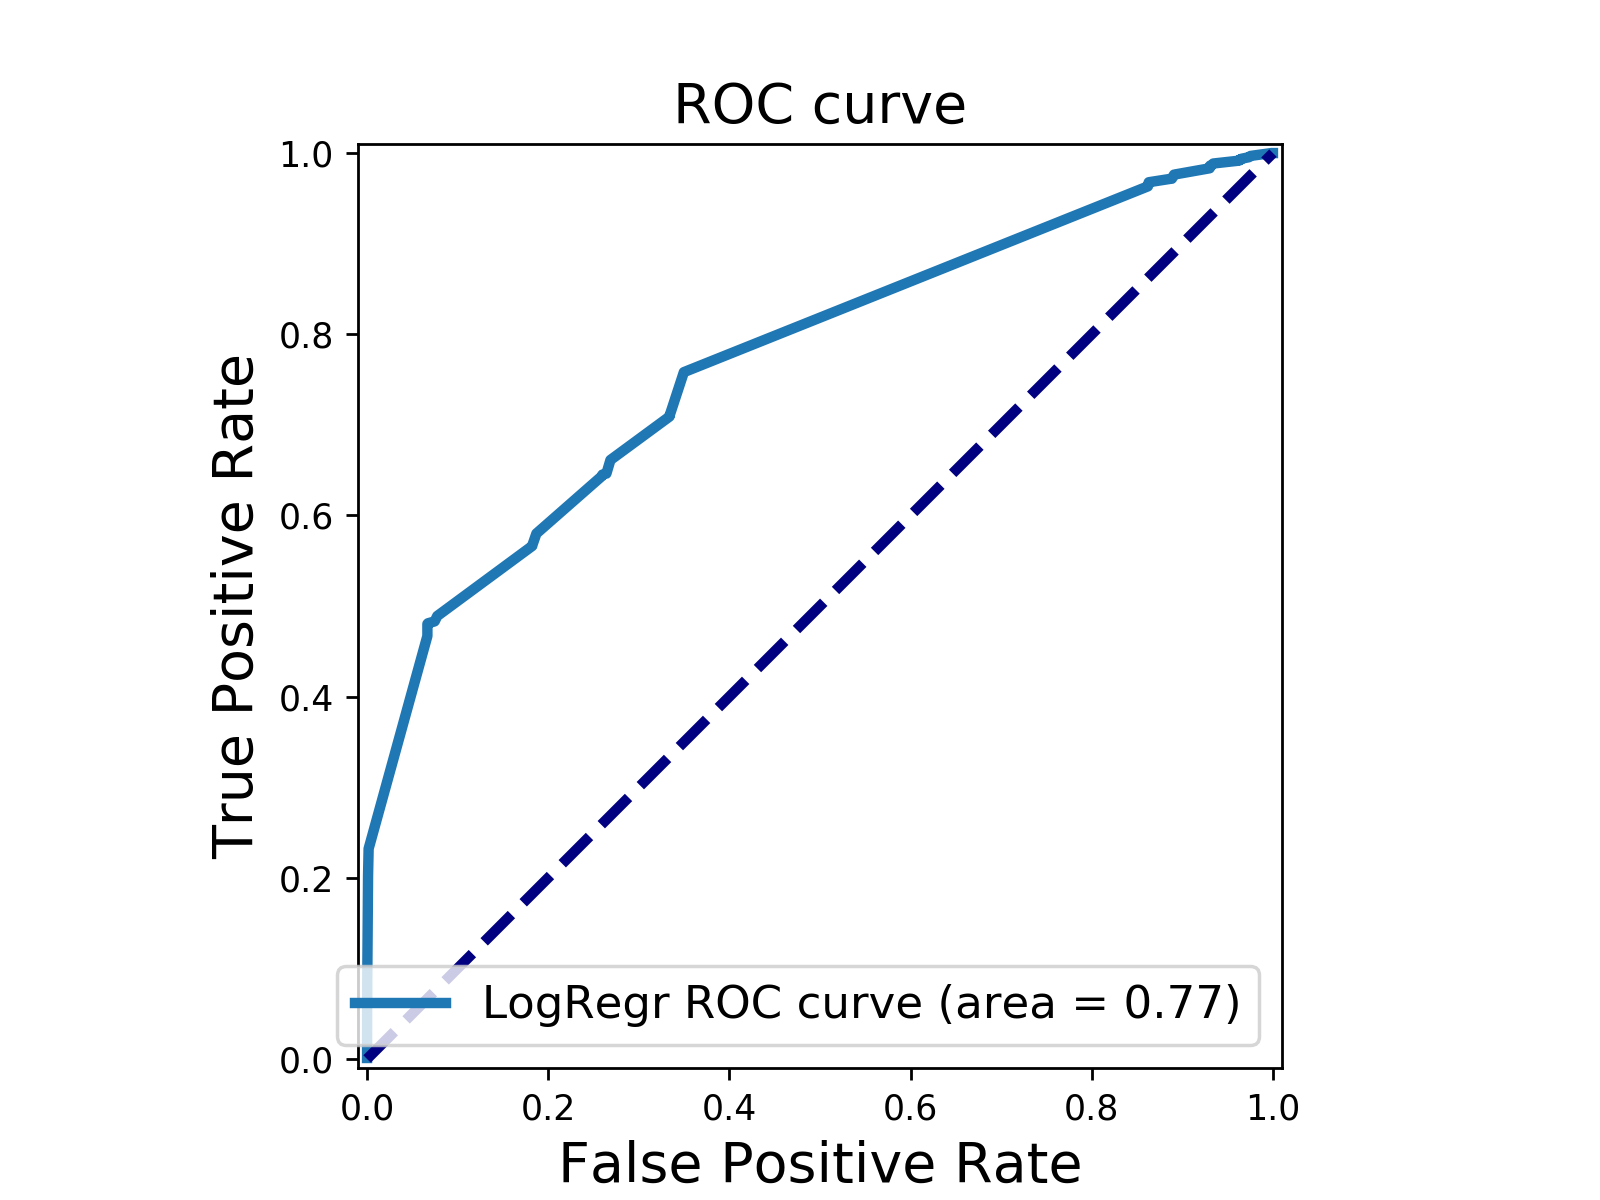

In [43]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

nnclf = MLPClassifier(hidden_layer_sizes = [18], activation='relu', solver='adam', random_state = 0, alpha = 5).fit(X_train, y_train.iloc[:,0])

y_probs = nnclf.predict_proba(X_test)
plot_auc(y_test, y_probs[:,1])

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

nnclf = MLPClassifier(hidden_layer_sizes = [18], activation='relu', solver='adam', random_state = 86, alpha = 5)
cv_scores = cross_val_score(nnclf, X_new, y.iloc[:,0], n_jobs=-1, scoring ='roc_auc', cv = 5)

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))

nnc

Cross-validation scores (3-fold): [ 0.76224561  0.74724047  0.79723644  0.75549273  0.75082758]
Mean cross-validation score (3-fold): 0.763


{'activation': 'relu',
 'alpha': 5,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': [18],
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 200,
 'momentum': 0.9,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 86,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

nnclf = MLPClassifier(hidden_layer_sizes = [9], solver='lbfgs', random_state = 0, alpha = 5.0).fit(X_train, y_train.iloc[:,0])

y_probs = nnclf.predict_proba(X_test)
plot_auc(y_test, y_probs[:,1])

## SVM

In [ ]:
# Finds best SVC with RBF kernal
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

clf = SVC(kernel='rbf')
grid_values = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

# metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc', n_jobs=-1)
grid_clf_auc.fit(X_train_subset, y_train_subset)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test_subset) 

print('Test set AUC: ', roc_auc_score(y_test_subset, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

clf = SVC(kernel='rbf')
grid_values = [{'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.01, 0.1, 1, 10, 100]}]

# metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc', n_jobs=-1)
grid_clf_auc.fit(X_train_subset, y_train_subset)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test_subset) 

print('Test set AUC: ', roc_auc_score(y_test_subset, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)

Test set AUC:  0.725487262944
Grid best parameter (max. AUC):  {'gamma': 0.01}
Grid best score (AUC):  0.675437119448

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics

svc_clf = SVC(gamma=0.01, kernel='rbf').fit(X_train_subset, y_train)
y_prob = svc_clf.predict(X_test_subset)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob)
metrics.auc(fpr, tpr)

In [ ]:
# Finds best SVC with POLY kernal
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

poly_clf = SVC(kernel='poly')
grid_values = {'degree': [2, 3, 6, 9]}

# alternative metric to optimize over grid parameters: AUC
grid_poly_clf_auc = GridSearchCV(poly_clf, param_grid = grid_values, scoring = 'roc_auc', n_jobs=-1)
grid_poly_clf_auc.fit(X_train_subset, y_train)
poly_y_decision_fn_scores_auc = grid_poly_clf_auc.decision_function(X_test_subset) 

print('Test set AUC: ', roc_auc_score(y_test, poly_y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_poly_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_poly_clf_auc.best_score_)

## Logistic Regression

In [ ]:
# Without Agency's Name
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
grid_values = [{'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100]}]

grid_clf_rec = GridSearchCV(clf, param_grid = grid_values, scoring ='roc_auc', n_jobs=-1)
grid_clf_rec.fit(X_train_subset, y_train_subset)
y_decision_fn_scores_rec = grid_clf_rec.decision_function(X_test_subset)
grid_clf_rec.cv_results_['mean_test_score'].reshape(5,2)

In [ ]:
# Without Inspector's Name
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
grid_values = [{'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100]}]

grid_clf_rec = GridSearchCV(clf, param_grid = grid_values, scoring ='roc_auc', n_jobs=-1)
grid_clf_rec.fit(X_train_subset, y_train_subset)
y_decision_fn_scores_rec = grid_clf_rec.decision_function(X_test_subset)
grid_clf_rec.cv_results_['mean_test_score'].reshape(5,2)